In [1]:
!pip install torch torchvision

!pip install ipywidgets

     |███████████████                 | 350.4 MB 99.2 MB/s eta 0:00:05     |██████████████████████▌         | 527.7 MB 2.1 MB/s eta 0:01:494     |███████████████                 | 351.4 MB 99.2 MB/s eta 0:00:05 0:00:05 |███████████████                 | 353.9 MB 99.2 MB/s eta 0:00:04███████████████▎                | 357.4 MB 2.5 MB/s eta 0:02:38     |███████████████▎                | 359.2 MB 2.5 MB/s eta 0:02:37��████████▍                | 360.2 MB 2.5 MB/s eta 0:02:37███████████████▌                | 362.8 MB 2.5 MB/s eta 0:02:36�████████▌                | 363.5 MB 2.5 MB/s eta 0:02:36              | 364.7 MB 2.5 MB/s eta 0:02:35    | 365.1 MB 2.5 MB/s eta 0:02:355 MB 2.5 MB/s eta 0:02:35|███████████████▊                | 368.7 MB 2.5 MB/s eta 0:02:35████████████▊                | 369.1 MB 2.5 MB/s eta 0:02:35     |███████████████▉                | 370.8 MB 2.5 MB/s eta 0:02:34|███████████████▉                | 371.3 MB 2.5 MB/s eta 0:02:34████████████▉                | 371.7 MB 2.5 

In [19]:
import torch
from torch import nn
from torch.nn import Sequential, Linear, MaxPool2d, ReLU, Conv2d
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import numpy as np

import csv
import json
import matplotlib.pyplot as plt
from IPython import display

In [20]:
# Download the training and testing data

training_data = datasets.EMNIST(
        root="data",
        train=True,
        download=True,
        transform=ToTensor(),
        split="balanced"
)

test_data = datasets.EMNIST(
        root="data",
        train=False,
        download=True,
        transform=ToTensor(),
        split="balanced"
)

In [21]:
# training set contains 112800, testing set contains 18800
print('Training data:', len(training_data))
print('Test data:', len(test_data))

Training data: 112800
Test data: 18800


In [22]:
batch_size = 64

# Create train and test data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

# A batch consists of 64 images, each 28x28 pixels
# Each pixel intensity is represented as a byte (0 to 255)
for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


In [23]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)
# define the models
class ConvNeuralNetwork(nn.Module):
    def __init__(self, conv_relu_stack=None, linear_stack=None):
        super(ConvNeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.conv_relu_stack = conv_relu_stack
        self.linear = linear_stack

    def forward(self, x):
        x = self.conv_relu_stack(x)
        x = self.flatten(x)
        logits = self.linear(x)
        return logits

cpu


In [24]:
# different conv_relu and linear stacks to use
stack1 = (nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.MaxPool2d(2),
            nn.ReLU(),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.MaxPool2d(2),
            nn.ReLU(),
            nn.Conv2d(256, 512, kernel_size=3, padding=1),
            nn.MaxPool2d(2),
            nn.ReLU(),
            nn.Conv2d(512, 1024, kernel_size=3, padding=1),
            nn.AvgPool2d(2),
            nn.ReLU()
        ),
nn.Linear(1024, 47)
)

stack2 = (nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.MaxPool2d(2),
            nn.ReLU(),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.MaxPool2d(2),
            nn.ReLU(),
            nn.Conv2d(256, 512, kernel_size=3, padding=1),
            nn.AvgPool2d(7),
            nn.ReLU()
        ),
nn.Linear(512, 47)
)

stack3 = (nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.MaxPool2d(3),
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.AvgPool2d(9),
            nn.ReLU()
        ),
nn.Linear(128, 47)
)

stack4 = (nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(3),
            nn.Dropout(p=0.5),
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.AvgPool2d(9),
            nn.ReLU()
        ),
nn.Linear(64, 47)
)

stack5 = (nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.MaxPool2d(2),
            nn.ReLU(),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.MaxPool2d(2),
            nn.ReLU(),
            nn.Conv2d(256, 512, kernel_size=3, padding=1),
            nn.MaxPool2d(2),
            nn.ReLU(),
            nn.Conv2d(512, 1024, kernel_size=3, padding=1),
            nn.AvgPool2d(2),
            nn.ReLU()
        ),
nn.Linear(1024, 47)
)

stack6 = (nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.MaxPool2d(2),
            nn.ReLU(),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.MaxPool2d(2),
            nn.ReLU(),
            nn.Conv2d(256, 512, kernel_size=3, padding=1),
            nn.AvgPool2d(7),
            nn.ReLU()
        ),
nn.Linear(512, 47)
)

stack7 = (nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.MaxPool2d(3),
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.AvgPool2d(9),
            nn.ReLU()
        ),
nn.Linear(128, 47)
)

stack8 = (nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(3),
            nn.Dropout(p=0.5),
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.AvgPool2d(9),
            nn.ReLU()
        ),
nn.Linear(64, 47)
)

stack9 = (nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.MaxPool2d(2),
            nn.ReLU(),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.MaxPool2d(2),
            nn.ReLU(),
            nn.Conv2d(256, 512, kernel_size=3, padding=1),
            nn.MaxPool2d(2),
            nn.ReLU(),
            nn.Conv2d(512, 1024, kernel_size=3, padding=1),
            nn.AvgPool2d(2),
            nn.ReLU()
        ),
nn.Linear(1024, 47)
)

stack10 = (nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.MaxPool2d(2),
            nn.ReLU(),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.MaxPool2d(2),
            nn.ReLU(),
            nn.Conv2d(256, 512, kernel_size=3, padding=1),
            nn.AvgPool2d(7),
            nn.ReLU()
        ),
nn.Linear(512, 47)
)

stack11 = (nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.MaxPool2d(3),
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.AvgPool2d(9),
            nn.ReLU()
        ),
nn.Linear(128, 47)
)

stack12 = (nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(3),
            nn.Dropout(p=0.5),
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.AvgPool2d(9),
            nn.ReLU()
        ),
nn.Linear(64, 47)
)

stack13 = (nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.MaxPool2d(2),
            nn.ReLU(),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.MaxPool2d(2),
            nn.ReLU(),
            nn.Conv2d(256, 512, kernel_size=3, padding=1),
            nn.MaxPool2d(2),
            nn.ReLU(),
            nn.Conv2d(512, 1024, kernel_size=3, padding=1),
            nn.AvgPool2d(2),
            nn.ReLU()
        ),
nn.Linear(1024, 47)
)

stack14 = (nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.MaxPool2d(2),
            nn.ReLU(),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.MaxPool2d(2),
            nn.ReLU(),
            nn.Conv2d(256, 512, kernel_size=3, padding=1),
            nn.AvgPool2d(7),
            nn.ReLU()
        ),
nn.Linear(512, 47)
)

stack15 = (nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.MaxPool2d(3),
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.AvgPool2d(9),
            nn.ReLU()
        ),
nn.Linear(128, 47)
)

stack16 = (nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(3),
            nn.Dropout(p=0.5),
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.AvgPool2d(9),
            nn.ReLU()
        ),
nn.Linear(64, 47)
)
stack_list = [stack1, stack2, stack3, stack4, stack5, stack6, stack7, stack8, stack9, stack10, stack11, stack12,
              stack13, stack14, stack15, stack16]

In [25]:
# create the models
model_list = [ConvNeuralNetwork(stack[0], stack[1]).to(device) for stack in stack_list]

In [26]:
# train function
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    losses = []
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        loss, current = loss.item(), batch * len(X)
        if batch % 100 == 0:
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
        losses.append(loss)

    return np.array(losses).mean()

In [27]:
# test function
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    return correct

In [54]:
header = ["total model number", "model number", "momentum", "learning rate"]
rows = []
# loss function and learning rate
model_hyperparams = [[0, 1e-1], [0.4, 1e-1], [0, 1e-2], [0.4, 1e-1]]

model_performances = {}
momentum = 0.0
learning_rate = 0.0
loss_fn = nn.CrossEntropyLoss()
epochs = 10
i = 0
for model_num, model in enumerate(model_list):
    if i % 4 == 0:
        index = int(i/4)
        momentum = model_hyperparams[index][0]
        learning_rate = model_hyperparams[index][1]
        print(momentum, learning_rate)
    #optimizer
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)
    history = {'losses': [], 'accuracies': []}
    print(f"Model {model_num}:")
    for t in range(epochs):
        print(f"Epoch {t+1}\n-------------------------------")
        print(loss_fn)
        history['losses'].append(train(train_dataloader, model, loss_fn, optimizer))
        history['accuracies'].append(test(test_dataloader, model, loss_fn))

    torch.save(model.state_dict(), "model"+str(model_num) + ".pt")
    rows.append([str(model_num), str(model_num % 4), str(momentum), str(learning_rate)])
    model_performances[model_num] = history
    i += 1

with open("performance_data.json", "w") as outfile:
    json.dump(model_performances, outfile)
outfile.close()

with open('model_hyperparameter.csv', 'w', encoding='utf8',newline='') as file:
    writer = csv.writer(file)
    writer.writerow(header)
    writer.writerows(rows)
file.close()

Model 0:
Epoch 1
-------------------------------
CrossEntropyLoss()
loss: 3.852119  [    0/112800]
loss: 3.852870  [ 6400/112800]
loss: 3.851678  [12800/112800]
loss: 3.850976  [19200/112800]
loss: 3.850127  [25600/112800]
loss: 3.849181  [32000/112800]
loss: 3.847482  [38400/112800]
loss: 3.850790  [44800/112800]
loss: 3.848399  [51200/112800]
loss: 3.850593  [57600/112800]


KeyboardInterrupt: 

In [28]:
with open("performance_data.json") as json_file:
     model_performances = json.load(json_file)
json_file.close()

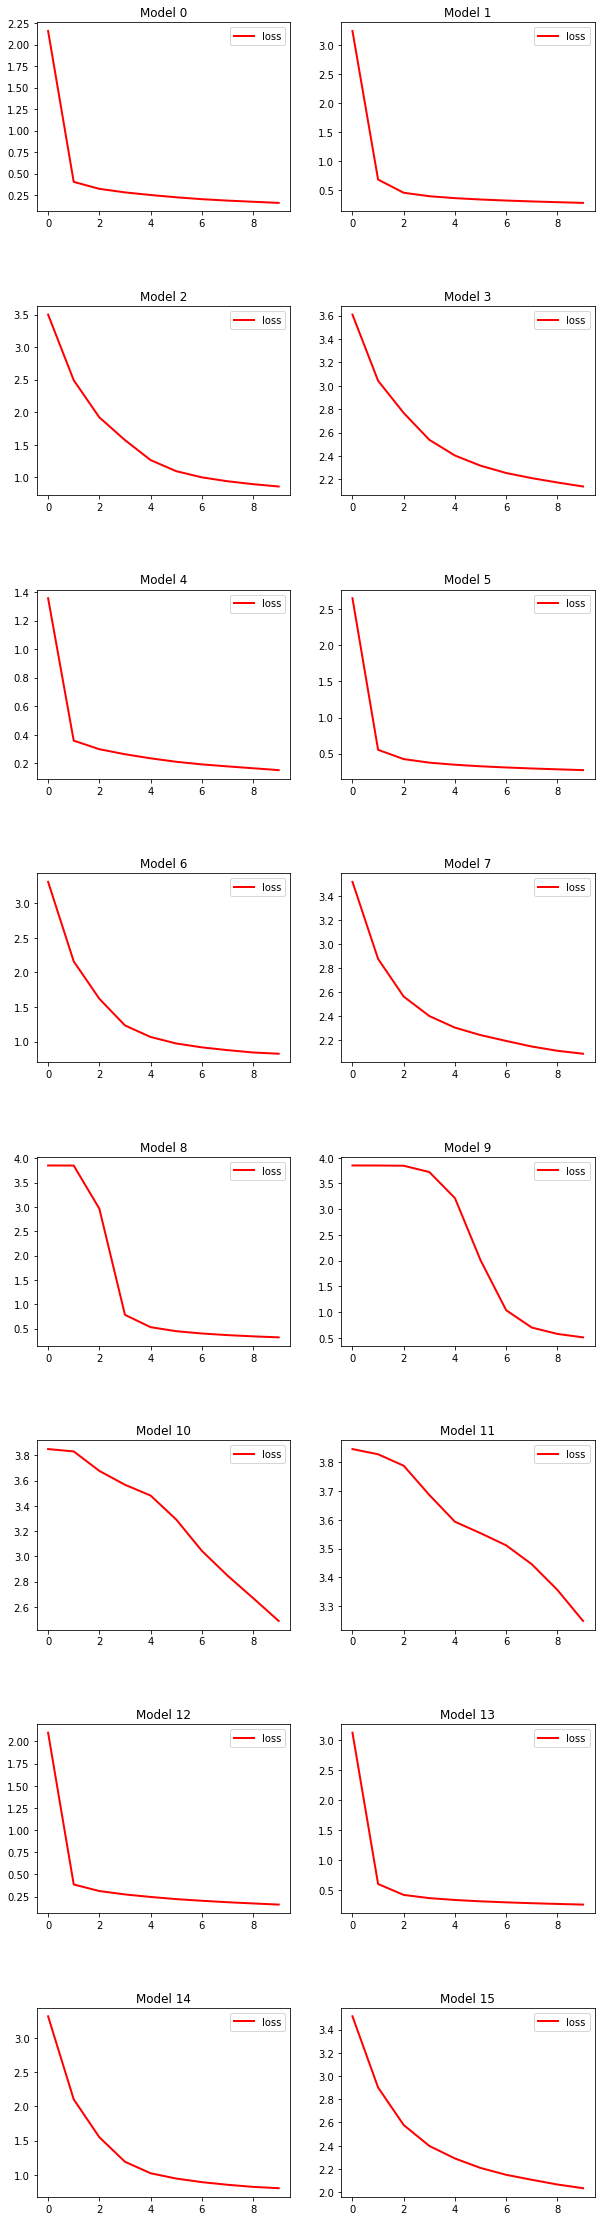

<Figure size 432x288 with 0 Axes>

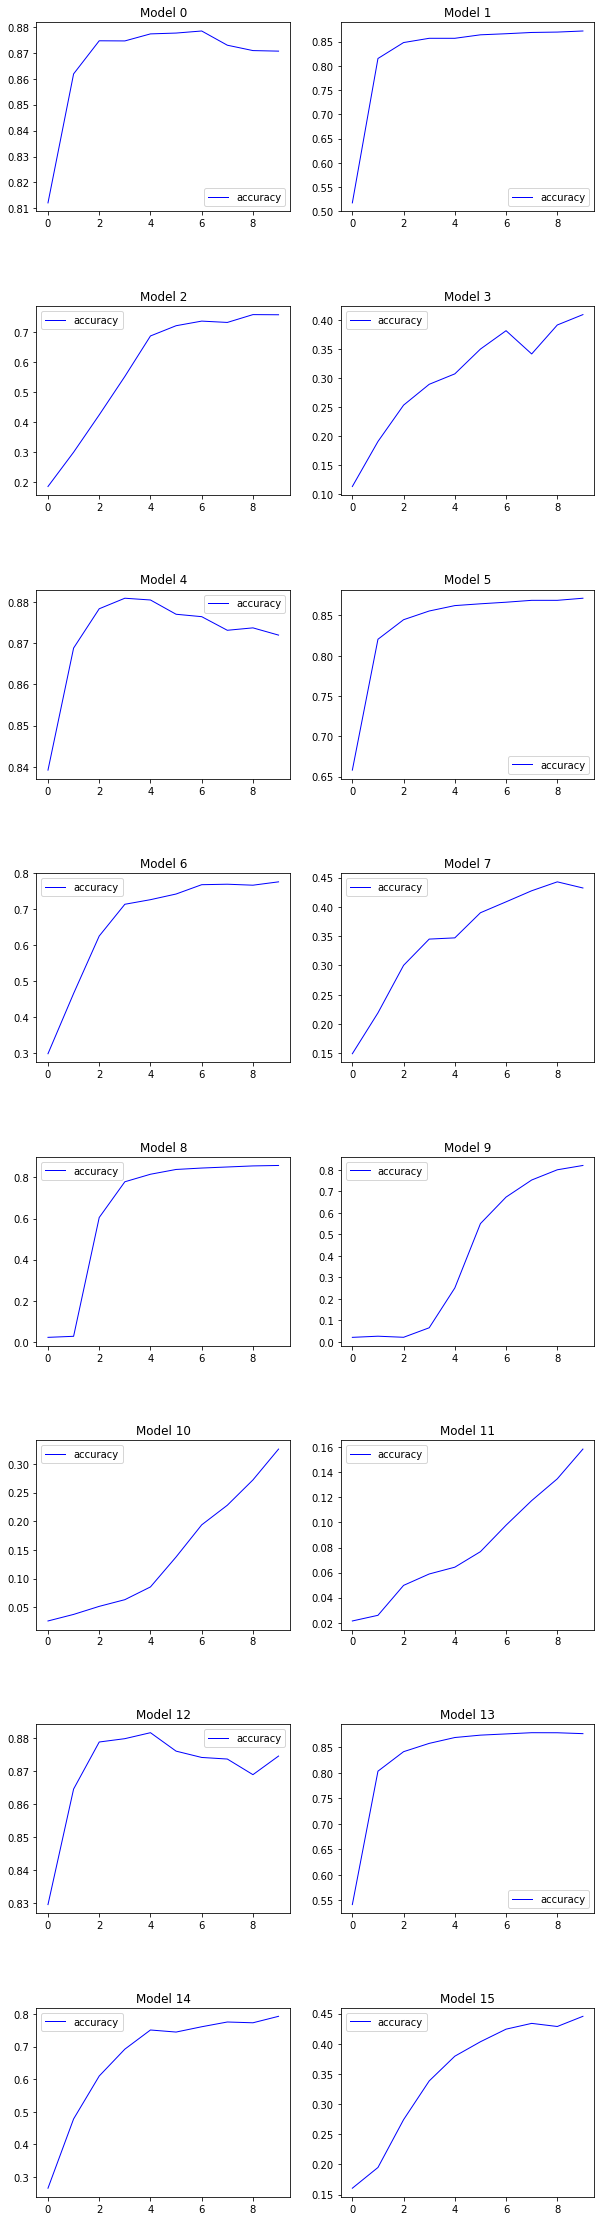

In [29]:
# visualize performances
n_rows = 8
n_cols = 2
scale = 5
plt.figure(figsize=(n_cols * scale, n_rows * scale))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.plot(model_performances[str(index)]['losses'], 'r-', lw=2, label='loss')
        plt.legend()
        plt.title("Model " + str(index), fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()


plt.clf()
plt.figure(figsize=(n_cols * scale, n_rows * scale))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.plot(model_performances[str(index)]['accuracies'], 'b-', lw=1, label='accuracy')
        plt.legend()
        plt.title("Model " + str(index), fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [31]:
# best result - based on accuracy

best_model_num = -1
best_final_accuracy = 0
for model_num in range (16):
    curr_acc = model_performances[str(model_num)]["accuracies"][-1]
    if curr_acc > best_final_accuracy:
        best_final_accuracy = curr_acc
        best_model_num = model_num
        
print(f"The best performing model is Model {best_model_num}, with a final accuracy of {best_final_accuracy}")
print(model_list[best_model_num])

The best performing model is Model 13, with a final accuracy of 0.876968085106383
ConvNeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (conv_relu_stack): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): ReLU()
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): ReLU()
    (10): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): AvgPool2d(kernel_size=7, stride=7, padding=0)
    (12): ReLU()
  )
  (linear): Linear(in_features=512, out_features=47, bias=True)
)
